# 线性回归

In [1]:
import torch
from time import time
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random
import torch.utils.data as Data

## tensor sum

In [2]:
a = torch.ones(1000)
b = torch.ones(1000)

**method 1: piecewise sum**

In [3]:
start = time()
c = torch.ones(1000)
for i in range(1000):
    c[i] = a[i] + b[i]
print(time() - start)

0.008764266967773438


**method 2: vector sum**

In [4]:
start = time()
c = a + b
print(time() - start)

6.580352783203125e-05


## generate dataset

In [5]:
num_inputs = 2
num_examples = 1000
t_w = [2., -3.] # true weights
t_b = 1. # true biases

features = torch.randn(num_examples, num_inputs, dtype=torch.float)
labels = t_w[0] * features[:, 0] + t_w[1] * features[:, 1] + t_b
# add noise
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

print(features.shape)
print(labels.shape)

torch.Size([1000, 2])
torch.Size([1000])


## show dataset

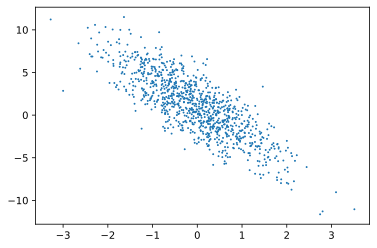

In [6]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
    
def set_figsize(fig_size=(6, 4)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = fig_size

set_figsize()

plt.scatter(features[:,1].numpy(), labels.numpy(), 1)

In [7]:
batch_size = 100

dataset = Data.TensorDataset(features, labels)
data_generator = Data.DataLoader(dataset, batch_size, shuffle=True)

In [8]:
# read data batch
for x, y in data_generator:
    print(x, y)
    break

tensor([[ 1.4727, -0.4480],
        [ 1.0368, -1.3214],
        [ 1.1897, -1.3388],
        [-1.6191, -1.1633],
        [ 0.8800,  0.9174],
        [ 0.7155, -1.0193],
        [ 0.8013, -0.9444],
        [ 0.3275, -0.1164],
        [-0.5294, -2.4055],
        [ 0.7332,  1.0512],
        [ 0.3849, -0.9423],
        [ 0.7794, -0.8091],
        [-0.5894,  0.5064],
        [-1.8632, -0.3178],
        [ 0.6678,  0.5204],
        [ 1.3076, -0.1458],
        [-0.9913, -0.7465],
        [-0.2314, -0.8140],
        [-0.3260,  0.8088],
        [ 0.1362,  1.0101],
        [ 1.0578, -0.1774],
        [-0.3615,  0.5658],
        [-1.2016,  0.2582],
        [ 0.6659,  0.4649],
        [-2.2812,  0.6123],
        [-0.2063,  0.1614],
        [ 0.9482, -0.2620],
        [ 0.9367, -0.2154],
        [ 0.0243,  0.7895],
        [-0.1959, -1.0351],
        [ 1.4502, -1.1096],
        [-1.5188, -1.2523],
        [-1.3169,  0.3931],
        [-1.1031,  1.1779],
        [-1.4769,  1.7795],
        [ 1.2583,  0

## initial model parameter

In [9]:
# initial w and b
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [10]:
# set requires grad
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

## define model

In [11]:
def linear_regression(x, w, b):
    return torch.mm(x, w) + b

## define loss function

In [12]:
def squared_loss(y_pred, y):
    return (y_pred - y.view(y_pred.size())) ** 2

## define optimizer

In [13]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

## train model

In [14]:
lr = 0.01
num_epochs = 20
net = linear_regression
loss = squared_loss

for epoch in range(num_epochs):
    for x, y in data_generator:
        l = loss(net(x, w, b), y).sum()  # computer batch loss
        l.backward() # use loss to compute grad
        sgd([w, b], lr, batch_size) # updata parameter
        
        # zero clearn grad
        w.grad.data.zero_()
        b.grad.data.zero_()
        
    epoch_loss = loss(net(features, w, b), labels).mean() # epoch loss
    print('epoch {} => loss {:.4}'.format(epoch+1, epoch_loss))
        

epoch 1 => loss 9.256
epoch 2 => loss 6.182
epoch 3 => loss 4.133
epoch 4 => loss 2.766
epoch 5 => loss 1.853
epoch 6 => loss 1.243
epoch 7 => loss 0.8347
epoch 8 => loss 0.561
epoch 9 => loss 0.3776
epoch 10 => loss 0.2544
epoch 11 => loss 0.1716
epoch 12 => loss 0.1159
epoch 13 => loss 0.07837
epoch 14 => loss 0.05307
epoch 15 => loss 0.03598
epoch 16 => loss 0.02444
epoch 17 => loss 0.01663
epoch 18 => loss 0.01133
epoch 19 => loss 0.007745
epoch 20 => loss 0.005309


In [15]:
print(t_w, '<=>', w.data)
print(t_b, '<=>', b.data)

[2.0, -3.0] <=> tensor([[ 1.9777],
        [-2.9297]])
1.0 <=> tensor([0.9925])
